In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
data.shape

(150, 6)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Text(0.5, 1.0, 'Sepal Length and Width (cm)')

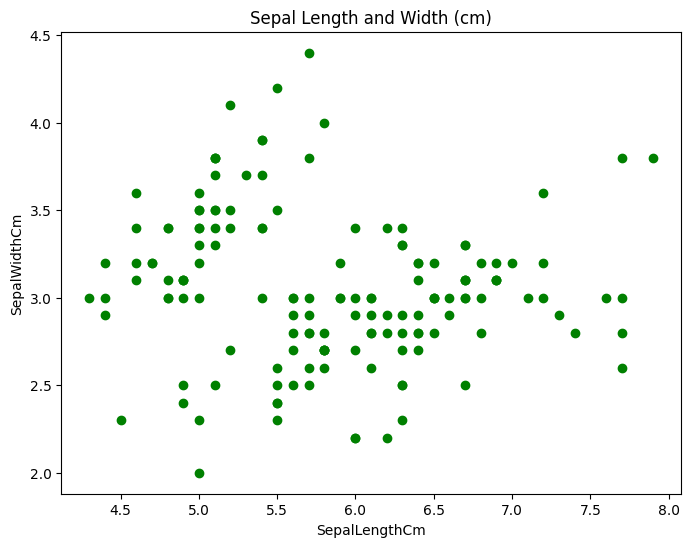

In [52]:
plt.figure(figsize = (8, 6))

plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], color = 'green')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Sepal Length and Width (cm)')

Text(0.5, 1.0, 'Petal Length and Width (cm)')

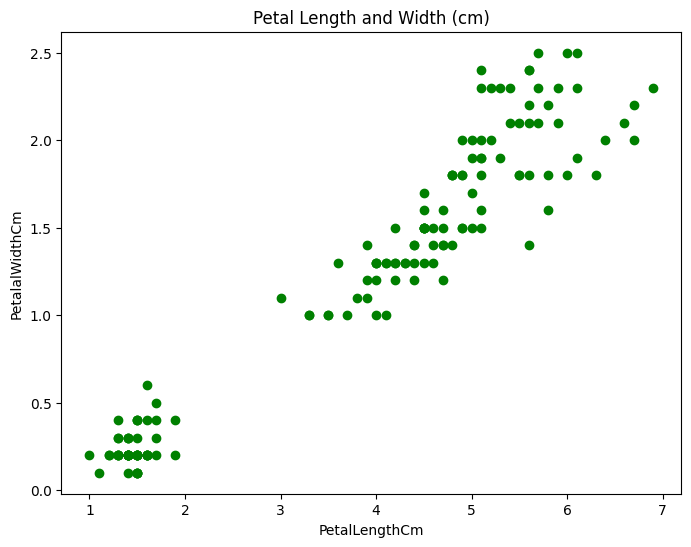

In [53]:
plt.figure(figsize = (8, 6))

plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], color = 'green')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalalWidthCm')
plt.title('Petal Length and Width (cm)')

In [54]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [55]:
data = data.drop(columns= ['Id', 'PetalLengthCm', 'PetalWidthCm','Species'])
data

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [56]:
# prepare a function for distance between 2 points

def distance_fn(a, b, ax = 1):
    return np.linalg.norm(a-b, axis = ax) # Euclidean distance

### Round 1

In [57]:
K = 3 # there are 3 groups
data = np.array(data)
data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [58]:
C_x = np.random.randint(np.min(data[:, 0]), np.max(data[:, 0]), size = K)
C_x

array([5, 6, 5])

In [59]:
C_y = np.random.randint(np.min(data[:, 1]), np.max(data[:, 1]), size = K)
C_y

array([3, 2, 2])

In [60]:
# Centriods

C = np.zeros((3, 2))
C

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [61]:
C_old = np.zeros(C.shape)
C_old

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [62]:
C[:, 0] = C_x 
C[:, 1] = C_y 
C

array([[5., 3.],
       [6., 2.],
       [5., 2.]])

### 2. Assign each data point to a specific cluster 

In [63]:
cluster_label = np.zeros((len(data), 1))
cluster_label

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [64]:
for i in range(len(data)): # run 150 rounds
    distance = distance_fn(data[i, :], C)
    cluster = np.argmin(distance) # for the shortest distance
    cluster_label[i] = cluster

In [65]:
(cluster_label == 0).sum()

74

### 3. Recalculate the new Contriods

In [66]:
C_old = C.copy()
C_old

array([[5., 3.],
       [6., 2.],
       [5., 2.]])

In [67]:
for i in range(K):
    pints = [] # empty list
    points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
    C[i] = np.mean(points, axis = 0) # calculate mean and keep in C for each group (i)

### Check if centriods have changed, repeat step 2 and 3

In [68]:
# calculate error

error = distance_fn(C, C_old, None)
error

1.1149577550254692

# create code to do looping to work as above steps

In [69]:
def plotCluster(data, C, cluster_label):

    colors = ['green', 'blue', 'orange', 'red', 'yellow', 'pink', 'purple', 'salmon']

    plt.figure(figsize = (8, 6))

    for i in range(K):
        points = [] # empty list
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s = 7, c = colors[i])
        
    plt.scatter(C[:, 0], C[:, 1], marker = '*', color = 'black', s = 200)

    plt.xlabel('PetalLengthCm')
    plt.ylabel('PetalalWidthCm')
    plt.title('Cluster')

0.3586428007797402
0.2955118533780369
0.22451687430034722
0.11595023674168525
0.07983894593082685
0.07944892170638468
0.07199473894770686
0.0159240394106494
0.0


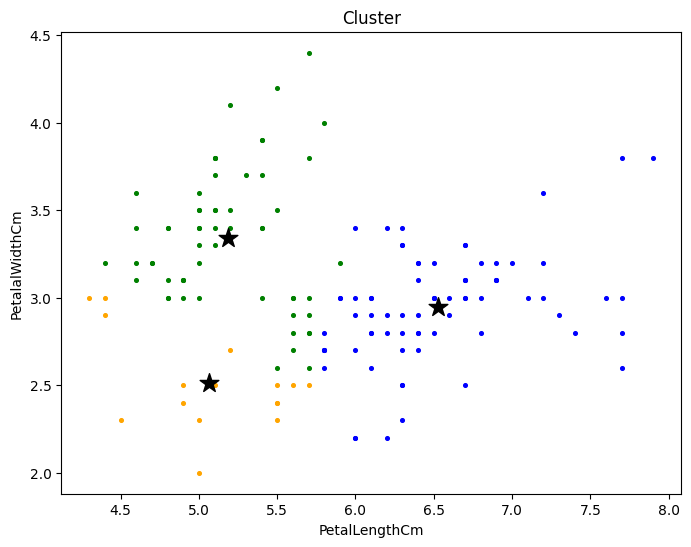

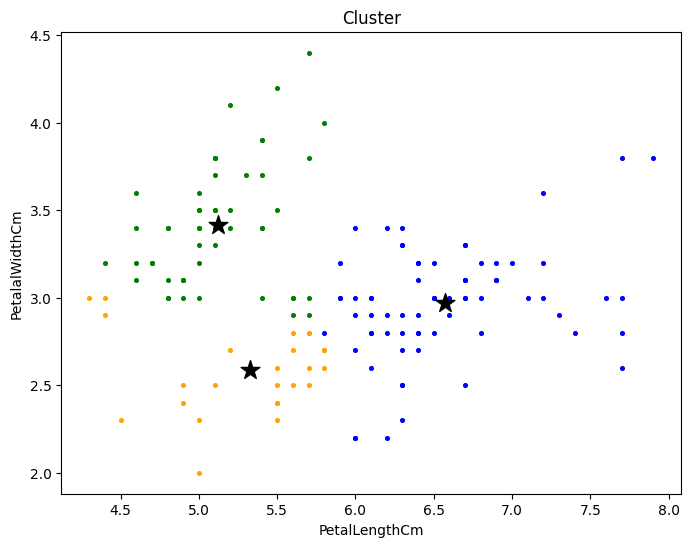

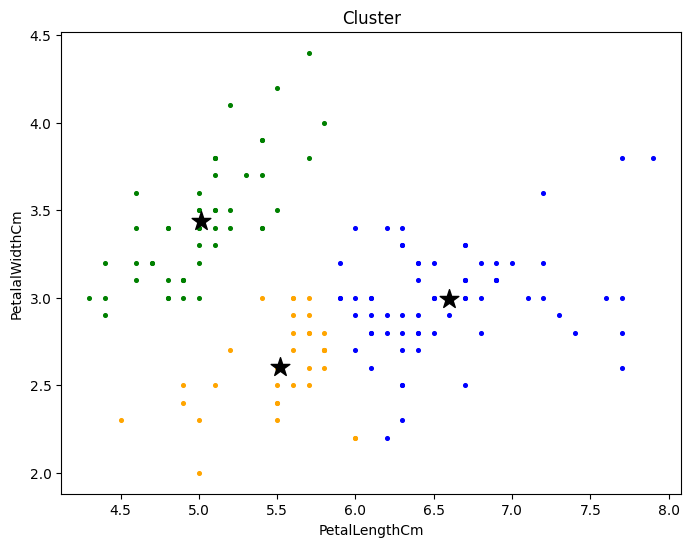

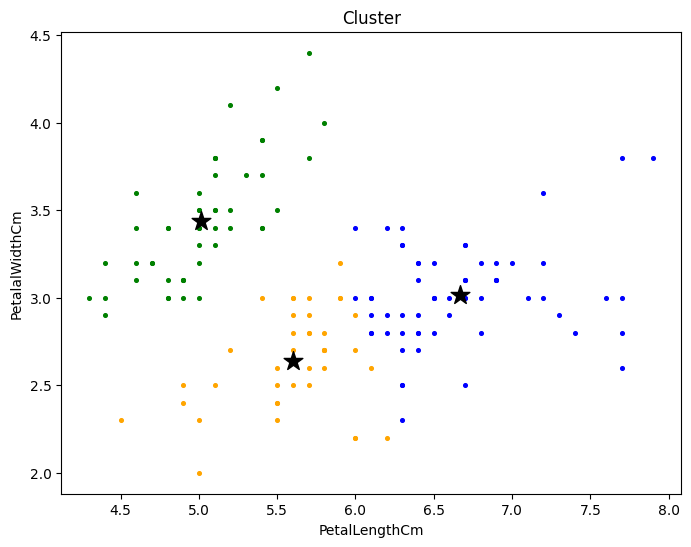

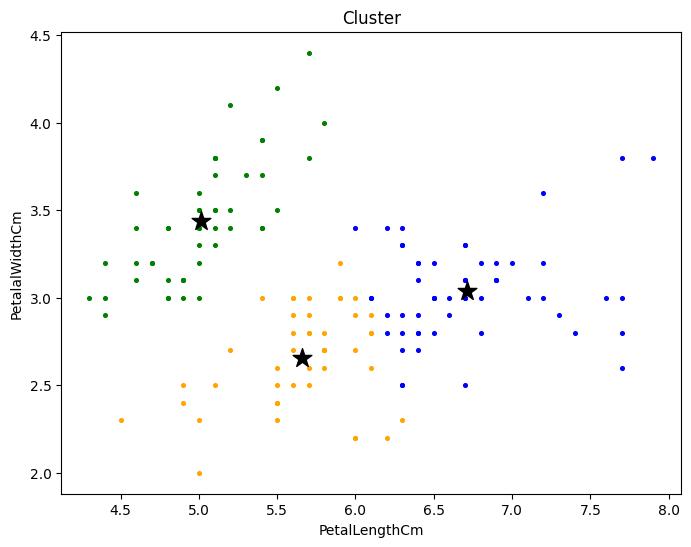

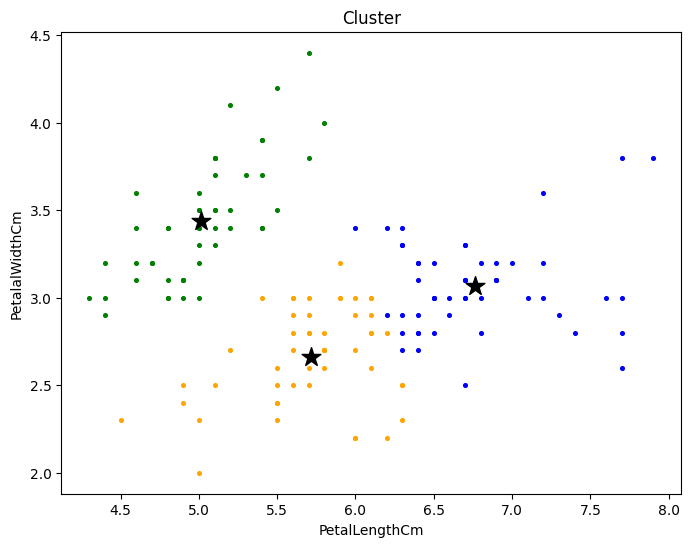

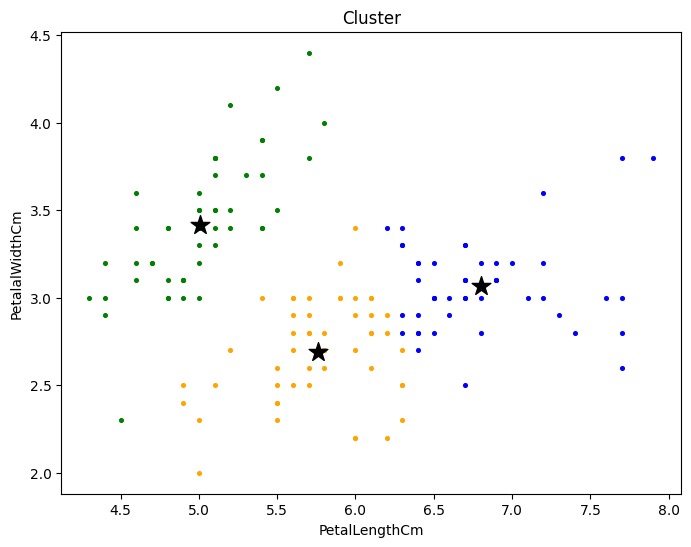

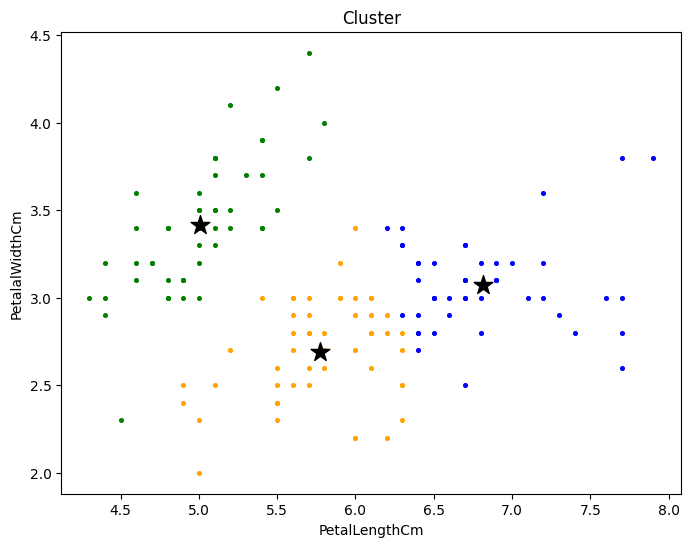

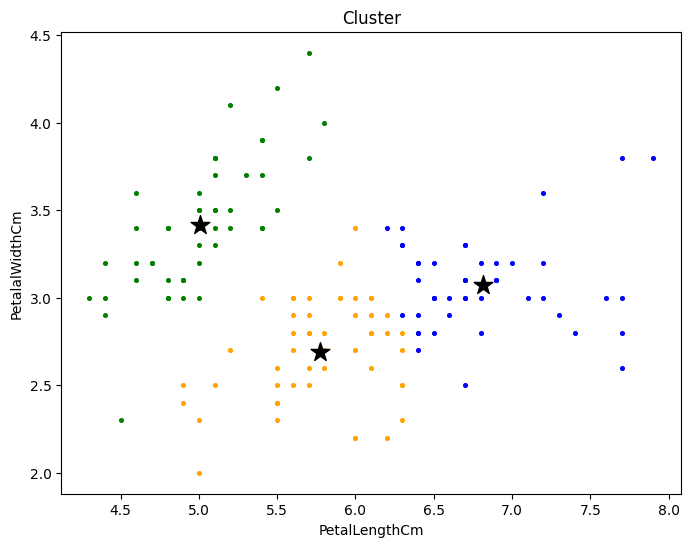

In [70]:
while error != 0: # will stop when error = 0
    
    cluster_label = np.zeros((len(data), 1))
    
    for i in range(len(data)):
        distance = distance_fn(data[i, :], C)
        cluster = np.argmin(distance)
        cluster_label[i] = cluster
    
    C_old = C.copy()
    
    for i in range(K):
        points = []
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
        C[i] = np.mean(points, axis=0)
        
    plotCluster(data, C, cluster_label.copy())
    
    error = distance_fn(C, C_old, None)
    print(error)
